# Step 1: Import necessary libraries

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Step 2: Load the dataset


In [38]:
file_path = r'C:\Users\mahmo\OneDrive\Desktop\Heart Attack Analysis & Prediction Dataset\heart.csv'  # Update with the correct path
heart_data = pd.read_csv(file_path)

# Step 3: Data visualization
    # 3.1: Countplot of the 'output' (target) variable

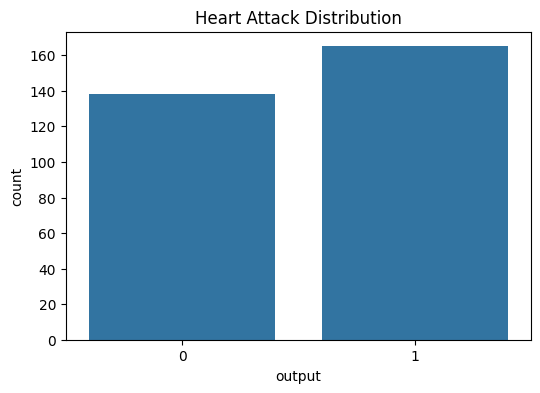

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='output', data=heart_data)
plt.title('Heart Attack Distribution')
plt.show()

    # 3.2: Histogram of 'age'   

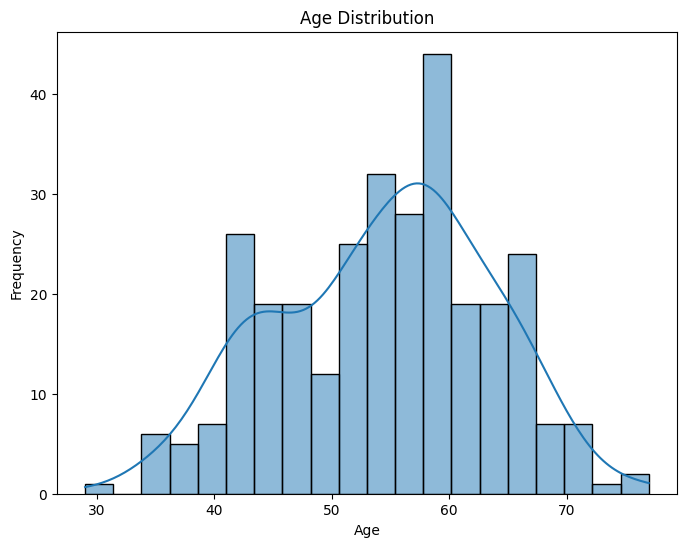

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(heart_data['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


    # 3.3: Scatter plot of 'age' vs 'chol' (cholesterol) colored by 'output'

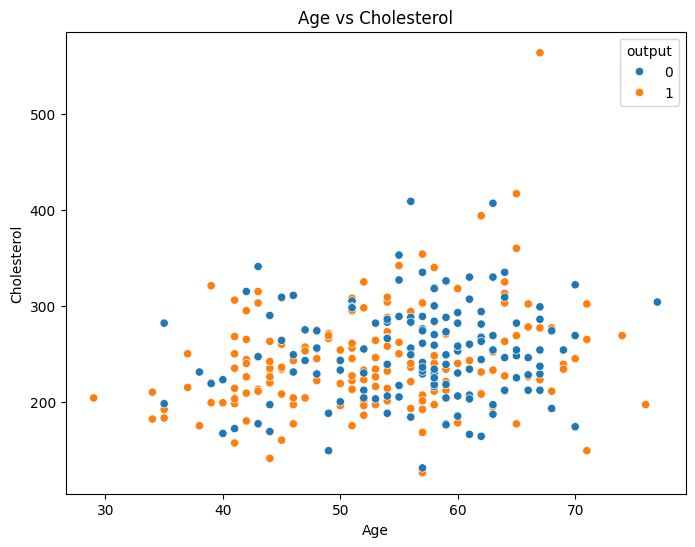

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='output', data=heart_data)
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

    # 3.4: Box plot of 'trtbps' (resting blood pressure) by heart attack risk


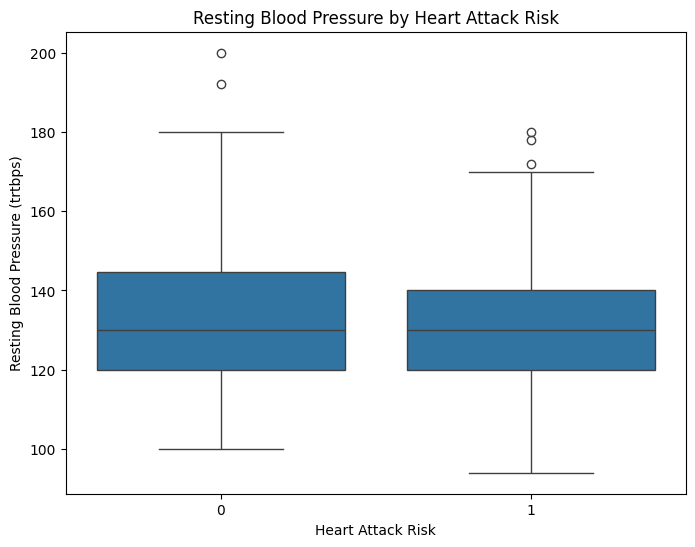

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='output', y='trtbps', data=heart_data)
plt.title('Resting Blood Pressure by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Resting Blood Pressure (trtbps)')
plt.show()

    # 3.5: Bar plot of chest pain type (cp) by heart attack risk

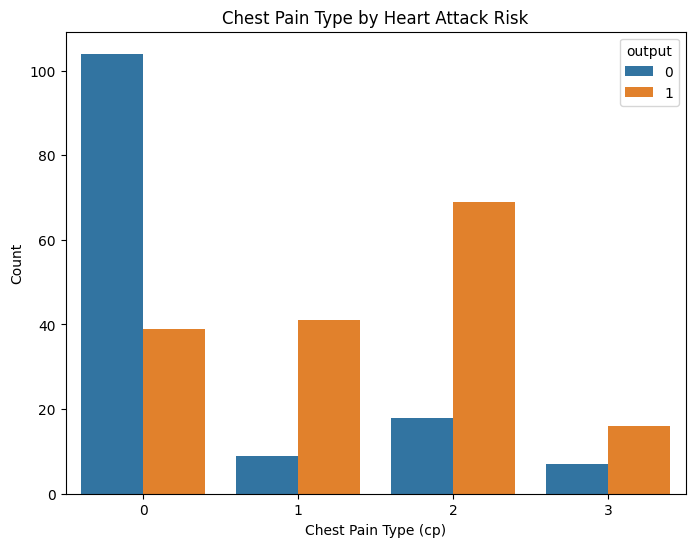

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='output', data=heart_data)
plt.title('Chest Pain Type by Heart Attack Risk')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.show()

    # 3.6: Heatmap of correlations

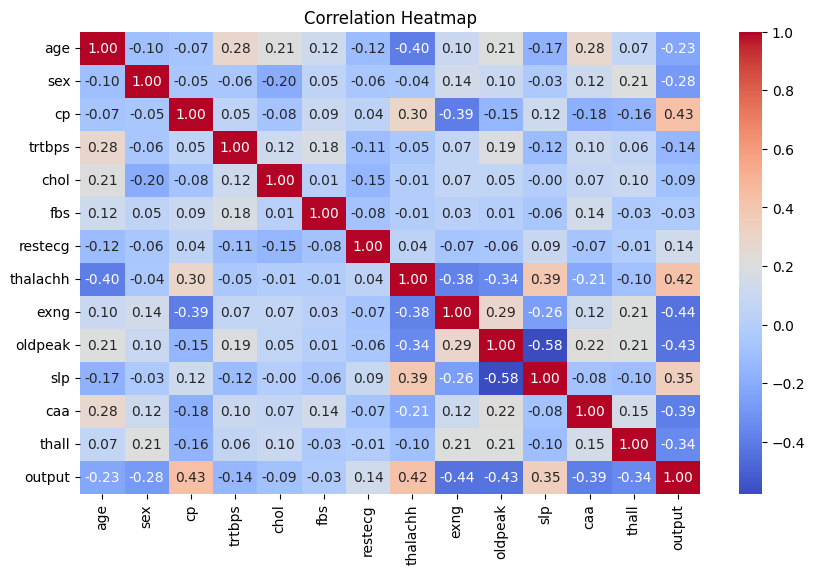

In [44]:
plt.figure(figsize=(10, 6))
correlation = heart_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Step 4: Data preprocessing
    # 4.1: Standardizing the numerical columns

In [45]:
scaler = StandardScaler()
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
heart_data[numerical_cols] = scaler.fit_transform(heart_data[numerical_cols])


    # 4.2: One-hot encoding the categorical columns

In [46]:

heart_data = pd.get_dummies(heart_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], drop_first=True)


# Step 5: Splitting data into train and test sets

In [47]:
X = heart_data.drop('output', axis=1)  # Features
y = heart_data['output']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Model training using Logistic Regression

In [48]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Step 7: Model evaluation

In [49]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

    # Output model evaluation

In [50]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:\n', class_report)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 90.16%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
 [[27  2]
 [ 4 28]]


# Step 8: Hyperparameter tuning with GridSearchCV

In [51]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Lasso or Ridge
    'solver': ['liblinear']   # Solver for small datasets
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

    # Best parameters and re-evaluation

In [52]:
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
best_class_report = classification_report(y_test, y_pred_best)


    # Output the tuned model's performance

In [53]:
print(f'Best Hyperparameters: {best_params}')
print(f'Best Accuracy: {best_accuracy * 100:.2f}%')
print('Best Classification Report:\n', best_class_report)

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 86.89%
Best Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Step 9: Cross-validation for Logistic Regression


In [54]:
log_reg_cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
log_reg_avg_cv_score = log_reg_cv_scores.mean()
print(f'Logistic Regression Cross-Validation Accuracy: {log_reg_avg_cv_score * 100:.2f}%')

Logistic Regression Cross-Validation Accuracy: 84.48%


# Step 10: Random Forest Classifier

In [55]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

    # Evaluate Random Forest model

In [56]:
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

    # Print Random Forest model evaluation

In [57]:
print('--- Random Forest Results ---')
print(f'Accuracy: {rf_accuracy * 100:.2f}%')
print('Classification Report:\n', rf_class_report)

--- Random Forest Results ---
Accuracy: 85.25%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



    # Cross-validation for Random Forest

In [58]:
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
rf_avg_cv_score = rf_cv_scores.mean()
print(f'Random Forest Cross-Validation Accuracy: {rf_avg_cv_score * 100:.2f}%')

Random Forest Cross-Validation Accuracy: 77.55%
